# Exchange Rate Time Series Analysis


### Data
Data is gathered from https://fred.stlouisfed.org using the FRED API. In this project, we consider 5 currencies - Euro, Japanese Yen, Indian Rupees, UK Pound Sterling, and Chinese Yuan.
The exchange rate in the collected data has a frequency of `Month` and is the average of the daily exchange rates.

The FRED API provides the exchange rate as a ratio of the two currencies based on the value of them compared to the other. The currencies with a value greater than USD are expressed as Currency/USD and those with lesser value are expressed as USD/Currency.

Countries with exchange rate in Currency/USD ratio:

- Euro
- United Kingdom
- China

***India and Japan have USD/Currency ratio.***


### Data Attributes

Date - date in ISO format

Value - currency rate


In [2]:
#!pip install fredapi

In [3]:
# import the necessary libraries
import pandas as pd
from fredapi import Fred
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data Extraction and Storing

In [4]:
# Creating the Fred object with the API key
fred = Fred(api_key='5360fcf565bf7f9e58774e34b589b521')

In [5]:
# Searching for different monthly Exchange rates 
fred.search('Exchange monthly japan').head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
EXJPUS,EXJPUS,2024-07-04,2024-07-04,Japanese Yen to U.S. Dollar Spot Exchange Rate,1971-01-01,2024-06-01,Monthly,M,Japanese Yen to One U.S. Dollar,Japanese Yen to 1 U.S. $,Not Seasonally Adjusted,NSA,2024-07-01 15:19:40-05:00,58,Averages of daily figures. Noon buying rates i...
RBJPBIS,RBJPBIS,2024-07-04,2024-07-04,Real Broad Effective Exchange Rate for Japan,1994-01-01,2024-05-01,Monthly,M,Index 2020=100,Index 2020=100,Not Seasonally Adjusted,NSA,2024-06-20 11:02:03-05:00,44,Real effective exchange rates are calculated a...
CCUSSP01JPM650N,CCUSSP01JPM650N,2024-07-04,2024-07-04,Currency Conversions: US Dollar Exchange Rate:...,1960-01-01,2023-11-01,Monthly,M,Yen,Yen,Not Seasonally Adjusted,NSA,2024-01-12 14:19:04-06:00,22,OECD Descriptor ID: CCUSSP01 OECD unit ID: JPY...
TWEXMMTH,TWEXMMTH,2024-07-04,2024-07-04,Nominal Major Currencies U.S. Dollar Index (Go...,1973-01-01,2019-12-01,Monthly,M,Index Mar 1973=100,Index Mar 1973=100,Not Seasonally Adjusted,NSA,2020-01-06 15:51:02-06:00,32,Averages of daily figures. A weighted average ...
XTEXVA01JPM667S,XTEXVA01JPM667S,2024-07-04,2024-07-04,International Merchandise Trade Statistics: Ex...,1957-01-01,2024-04-01,Monthly,M,"US dollars, exchange rate converted","US $, exchange rate converted",Seasonally Adjusted,SA,2024-06-17 14:13:02-05:00,19,OECD Data Filters: REF_AREA: JPN COUNTERPART_...


In [6]:
# The EURO/USD ratio is obtained and stored to the local
euro_monthly = fred.get_series(series_id = 'EXUSEU')
euro_monthly.to_csv('data/eurom.csv')
euro_monthly

1999-01-01    1.1591
1999-02-01    1.1203
1999-03-01    1.0886
1999-04-01    1.0701
1999-05-01    1.0630
               ...  
2024-02-01    1.0793
2024-03-01    1.0870
2024-04-01    1.0724
2024-05-01    1.0810
2024-06-01    1.0763
Length: 306, dtype: float64

In [7]:
# The USD/JPY ratio is obtained and stored to the local
japan_monthly = fred.get_series(series_id = 'EXJPUS')
japan_monthly.to_csv('data/japanm.csv')
japan_monthly

1971-01-01    358.0200
1971-02-01    357.5450
1971-03-01    357.5187
1971-04-01    357.5032
1971-05-01    357.4130
                ...   
2024-02-01    149.6150
2024-03-01    149.8186
2024-04-01    153.8900
2024-05-01    155.8691
2024-06-01    157.8600
Length: 642, dtype: float64

In [8]:
# The USD/INR ratio is obtained and stored to the local
ind_monthly = fred.get_series(series_id = 'EXINUS')
ind_monthly.to_csv('data/indm.csv')
ind_monthly

1973-01-01     8.0041
1973-02-01     7.7538
1973-03-01     7.5465
1973-04-01     7.5462
1973-05-01     7.4927
               ...   
2024-02-01    82.9485
2024-03-01    83.0214
2024-04-01    83.3968
2024-05-01    83.3873
2024-06-01    83.4600
Length: 618, dtype: float64

In [9]:
# The GBP/USD ratio is obtained and stored to the local
uk_monthly = fred.get_series(series_id = 'EXUSUK')
uk_monthly.to_csv('data/ukm.csv')
uk_monthly

1971-01-01    2.4058
1971-02-01    2.4178
1971-03-01    2.4187
1971-04-01    2.4179
1971-05-01    2.4187
               ...  
2024-02-01    1.2630
2024-03-01    1.2713
2024-04-01    1.2517
2024-05-01    1.2636
2024-06-01    1.2716
Length: 642, dtype: float64

In [10]:
# The CHY/USD ratio is obtained and stored to the local
chn_monthly = fred.get_series(series_id = 'EXCHUS')
chn_monthly.to_csv('data/chinam.csv')
chn_monthly

1981-01-01    1.5518
1981-02-01    1.6131
1981-03-01    1.6314
1981-04-01    1.6660
1981-05-01    1.7270
               ...  
2024-02-01    7.1935
2024-03-01    7.2015
2024-04-01    7.2374
2024-05-01    7.2327
2024-06-01    7.2547
Length: 522, dtype: float64

## Data Cleaning and Pre-Processing

### 1) Convert the Series into a Dataframe

- Consider the data from 2014 only; Slice the dataset
- Set the date column as the index
- Type cast the date column into datetime type, if not already

In [11]:
euro_df = pd.DataFrame({'Exchange_rate': euro_monthly})
ind_df = pd.DataFrame({'Exchange_rate': ind_monthly})
japan_df = pd.DataFrame({'Exchange_rate': japan_monthly})
uk_df = pd.DataFrame({'Exchange_rate': uk_monthly})
chn_df = pd.DataFrame({'Exchange_rate': chn_monthly})

In [12]:
euro_df = euro_df.loc['2014-01-01':'2024-01-01']
ind_df = ind_df.loc['2014-01-01':'2024-01-01']
japan_df = japan_df.loc['2014-01-01':'2024-01-01']
uk_df = uk_df.loc['2014-01-01':'2024-01-01']
chn_df = chn_df.loc['2014-01-01':'2024-01-01']

In [13]:
euro_df.index = pd.to_datetime(euro_df.index)
ind_df.index = pd.to_datetime(ind_df.index)
japan_df.index = pd.to_datetime(japan_df.index)
uk_df.index = pd.to_datetime(uk_df.index)
chn_df.index = pd.to_datetime(chn_df.index)

In [14]:
# Setting the period of the data to be the Month Start
euro_df = euro_df.asfreq('MS')
ind_df = ind_df.asfreq('MS')
japan_df = japan_df.asfreq('MS')
uk_df = uk_df.asfreq('MS')
chn_df = chn_df.asfreq('MS')

### 2) Missing value treatment


In [15]:
euro_df.isnull().sum()

Exchange_rate    0
dtype: int64

In [16]:
japan_df.isnull().sum()

Exchange_rate    0
dtype: int64

In [17]:
ind_df.isnull().sum()

Exchange_rate    0
dtype: int64

In [18]:
uk_df.isnull().sum()

Exchange_rate    0
dtype: int64

In [19]:
chn_df.isnull().sum()

Exchange_rate    0
dtype: int64

There are no missing values in the data sets!

### 3) Initial Visualization of the Exchange Rates

#### a) Currencies with greater value than USD

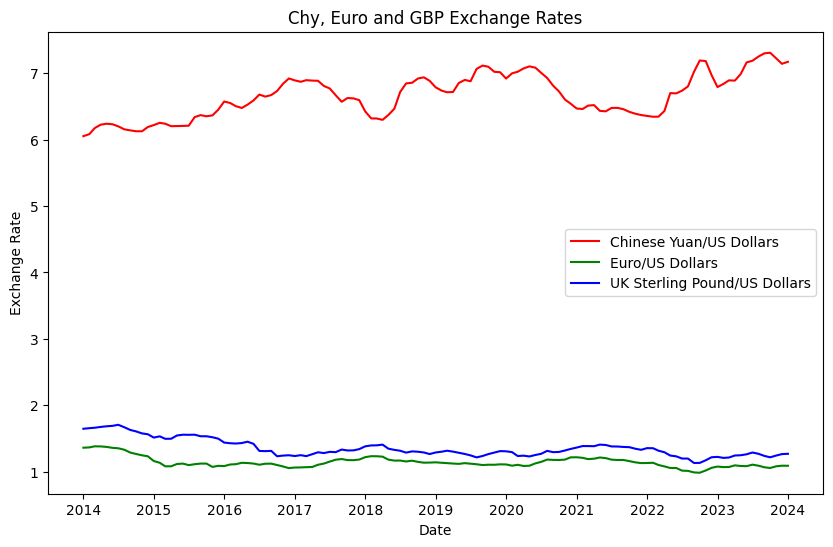

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(chn_df['Exchange_rate'], color='red', label = "Chinese Yuan/US Dollars")
plt.plot(euro_df['Exchange_rate'], color='green', label = "Euro/US Dollars")
plt.plot(uk_df['Exchange_rate'], color='blue', label = "UK Sterling Pound/US Dollars")
plt.title('Chy, Euro and GBP Exchange Rates')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

#### b) Currencies with values lesser than USD

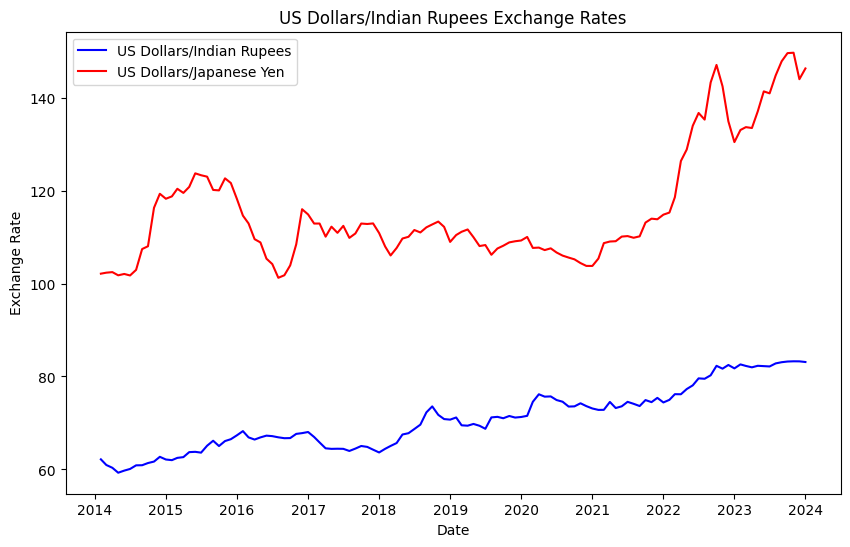

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(ind_df['Exchange_rate'], color='blue', label = "US Dollars/Indian Rupees")
plt.plot(japan_df['Exchange_rate'], color='red', label = "US Dollars/Japanese Yen")
plt.title('US Dollars/Indian Rupees Exchange Rates')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

### 4) Standardize the Exchange Rates
- Convert all the currencies exchange rates into the same format. For simplicity, let it be 1 USD = x foreign
- To implement this, we have to find the reciprocal of rates of te currencies with greater value than USD.

The purpose of standardizing exchange rates in this manner is to facilitate comparison and analysis by converting all exchange rates into a consistent format relative to USD. By taking the reciprocal of exchange rates where the foreign currency is stronger than USD, we effectively express these rates as how much of the foreign currency equals 1 USD. This transformation simplifies calculations and comparisons across different currencies.

In [24]:
euro_df['Exchange_rate'] = 1/(euro_df['Exchange_rate'])
uk_df['Exchange_rate'] = 1/(uk_df['Exchange_rate'])
chn_df['Exchange_rate'] = 1/(chn_df['Exchange_rate'])

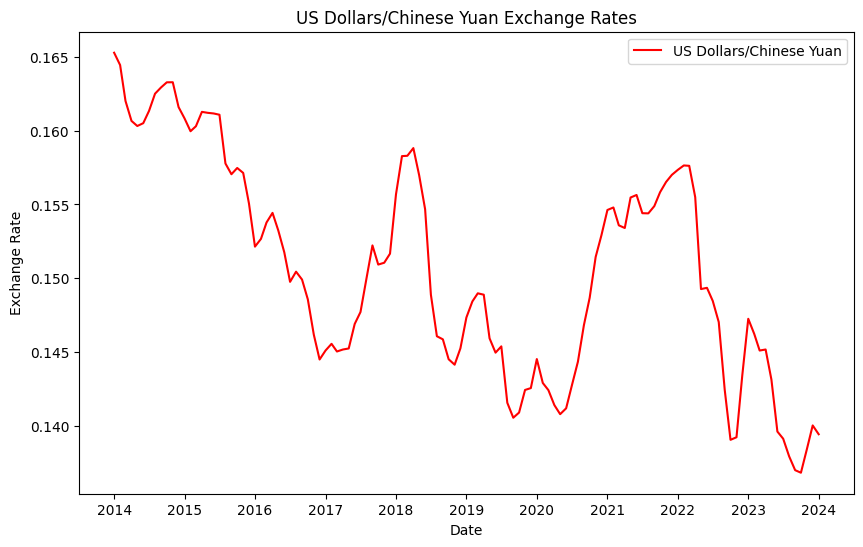

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(chn_df['Exchange_rate'], color='red', label = "US Dollars/Chinese Yuan")
plt.title('US Dollars/Chinese Yuan Exchange Rates')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

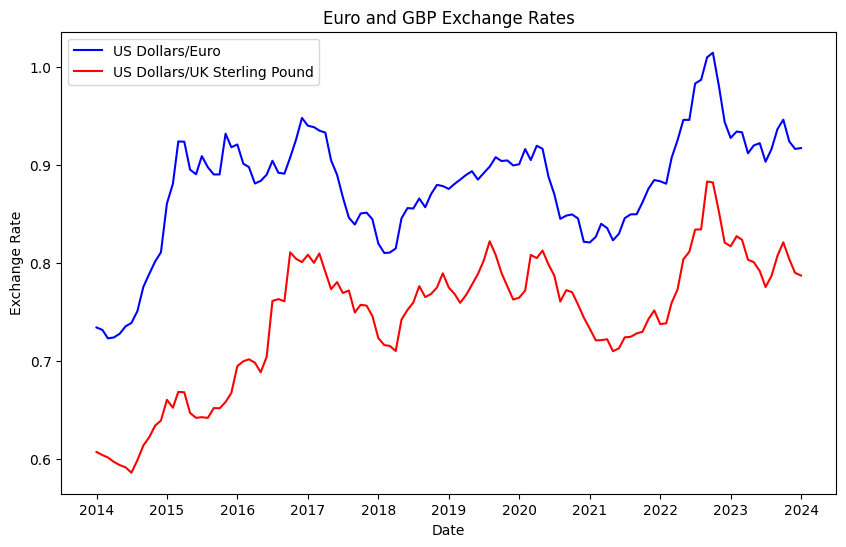

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(euro_df['Exchange_rate'], color='blue', label = "US Dollars/Euro")
plt.plot(uk_df['Exchange_rate'], color='red', label = "US Dollars/UK Sterling Pound")
plt.title('Euro and GBP Exchange Rates')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

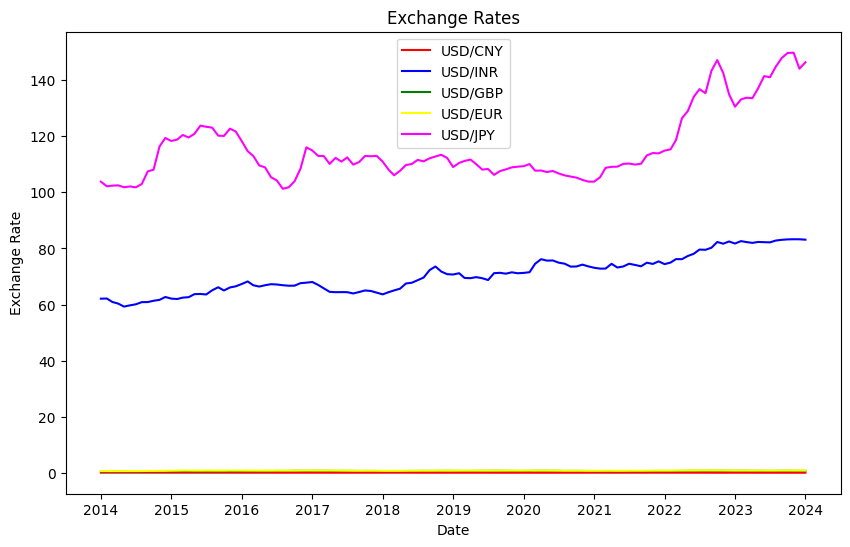

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(chn_df['Exchange_rate'], color='red', label = "USD/CNY")
plt.plot(ind_df['Exchange_rate'], color='blue', label = "USD/INR")
plt.plot(uk_df['Exchange_rate'], color='green', label = "USD/GBP")
plt.plot(euro_df['Exchange_rate'], color='yellow', label = "USD/EUR")
plt.plot(japan_df['Exchange_rate'], color='magenta', label = "USD/JPY")
plt.title('Exchange Rates')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

### 5) Testing for Stationarity

#### a) Mean and Standard Deviation

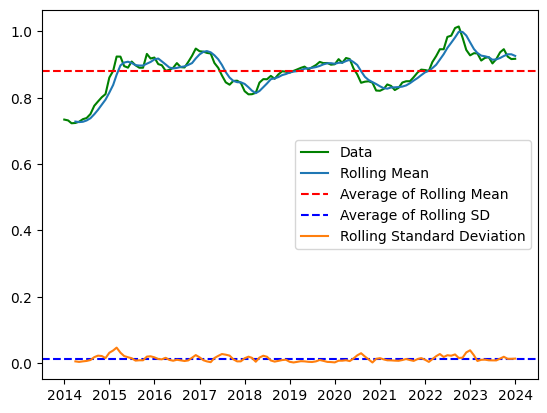

In [28]:
window_size = 4 # Quarterly window
rolling_mean = euro_df['Exchange_rate'].rolling(window=window_size).mean()
rolling_std = euro_df['Exchange_rate'].rolling(window=window_size).std()
plt.plot(euro_df['Exchange_rate'], color = 'g', label = 'Data')
plt.plot(rolling_mean, label = "Rolling Mean")
plt.axhline(y= np.mean(rolling_mean), color='r', linestyle='--', label = "Average of Rolling Mean")
plt.axhline(y= np.mean(rolling_std), color='b', linestyle='--', label = "Average of Rolling SD")
plt.plot(rolling_std, label = "Rolling Standard Deviation")
plt.legend();

#### Interpretation

Theoretically, the time series should only depend on the previous data point and should be independent of the time dimension. i.e., it should have a constant mean and variance throughout the time. Such time-series are considered stationary and are good for further time-series analysis.

For the given data of the `USD/Euro` ratio, the following observations are made - 

- The data does not have a constant mean throughout the time range and therefore, is `Non-stationary`.
- The data, therefore, does not qualify to be weakily stationary and we  converted it into stationary by differencing with adjacent data points.

The same interpretation is extended to the other data sets also.

#### b)  Augmented Dickey-Fuller Test

`Null Hypothesis`: The dataset is non-stationary.</b>

`Alternate Hypothesis`: The dataset is stationary.

<i>The Null hypothesis is rejected if the p-value is less than 0.05</i>

In [29]:
from statsmodels.tsa.stattools import adfuller

In [30]:
# Perform the Augmented Dickey-Fuller (ADF) test
result = adfuller(euro_df['Exchange_rate'])

# Extract and print the test statistic and p-value
adf_statistic = result[0]
p_value = result[1]
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)
print('Critical Values',result[4])


ADF Statistic: -2.911397428466999
p-value: 0.04403859407094815
Critical Values {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}


#### Interpretation

- The p-value is almost equal to `0.05`, therefore, the Null Hypothesis is accepted, i.e., the data is `Non-stationary`!

Both the above tests say that the dataset is non-stationary!

Therefore, it has to be converted to stationary before applying any time-series analysis

### 6) Dealing with Non-Stationarity

#### a) Decomposing the Time Series

We used the `seasonal_decompose()` function to extract the trend, seasonality, and residuals of the datasets. This helped us better visualize the seasonal trends.

In [31]:
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

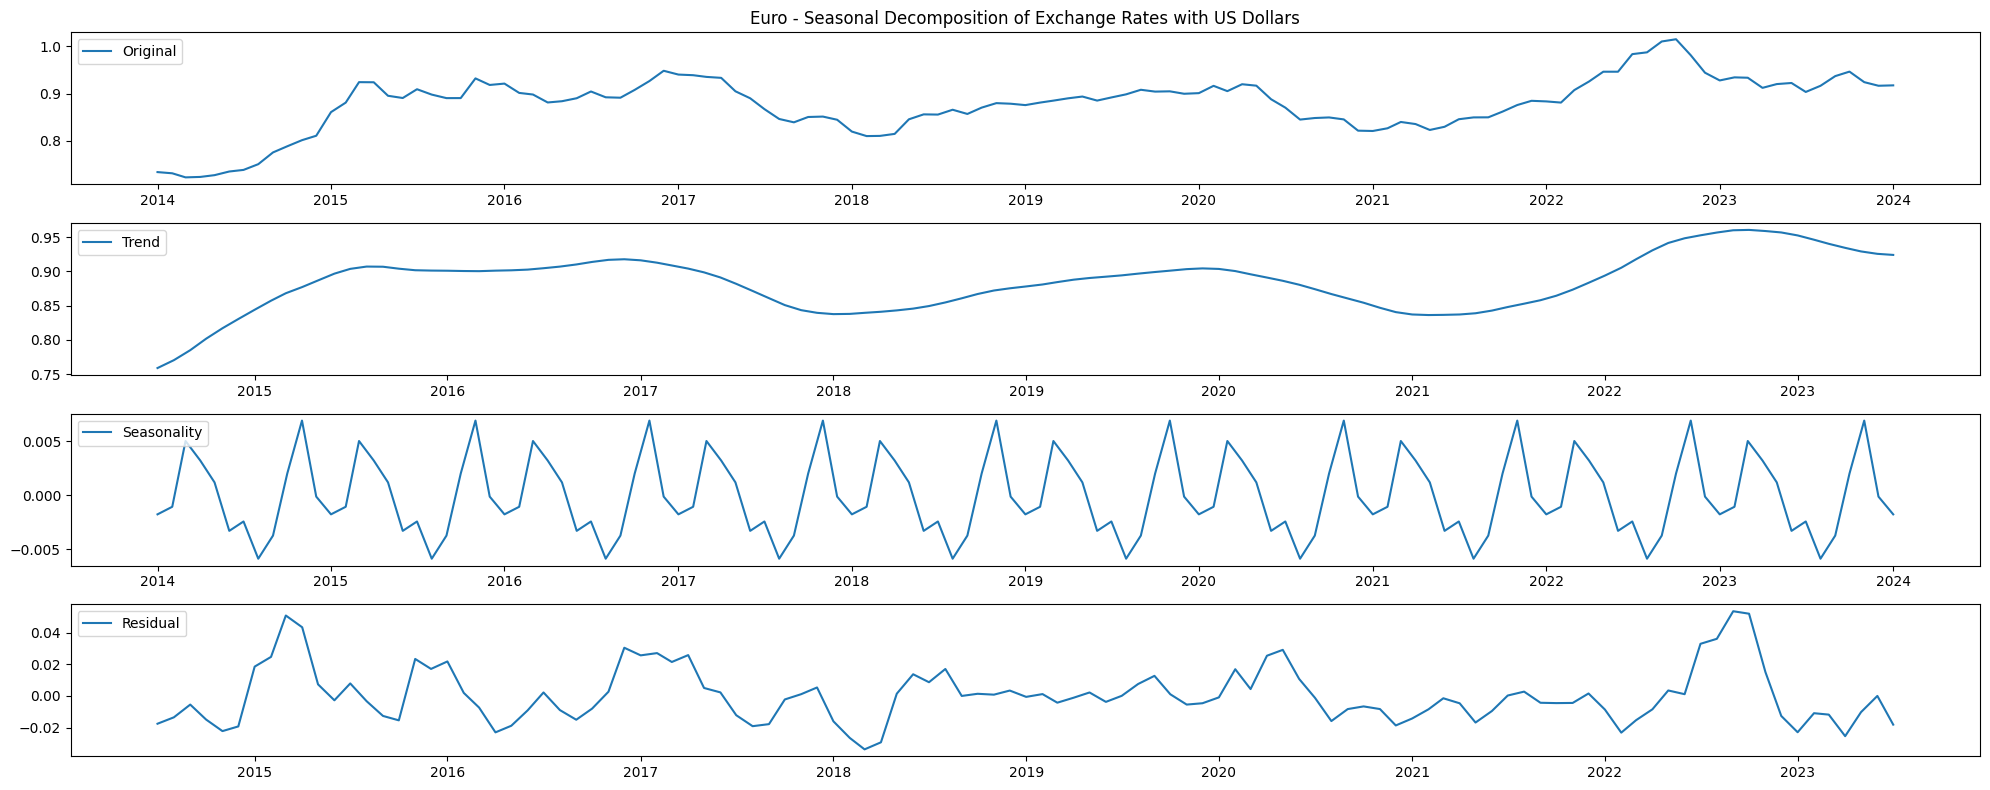

In [32]:
euro_decomposition = seasonal_decompose(euro_df['Exchange_rate'], model='additive', period = 12)
euro_trend = euro_decomposition.trend
euro_seasonal = euro_decomposition.seasonal
euro_residual = euro_decomposition.resid
plt.figure(figsize = (20,8))
plt.subplot(411)
plt.title("Euro - Seasonal Decomposition of Exchange Rates with US Dollars")
plt.plot(euro_df, label = "Original")
plt.legend(loc = "upper left")
plt.subplot(412)
plt.plot(euro_trend, label = "Trend")
plt.legend(loc = "upper left")
plt.subplot(413)
plt.plot(euro_seasonal, label = "Seasonality")
plt.legend(loc = "upper left")
plt.subplot(414)
plt.plot(euro_residual, label = "Residual")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

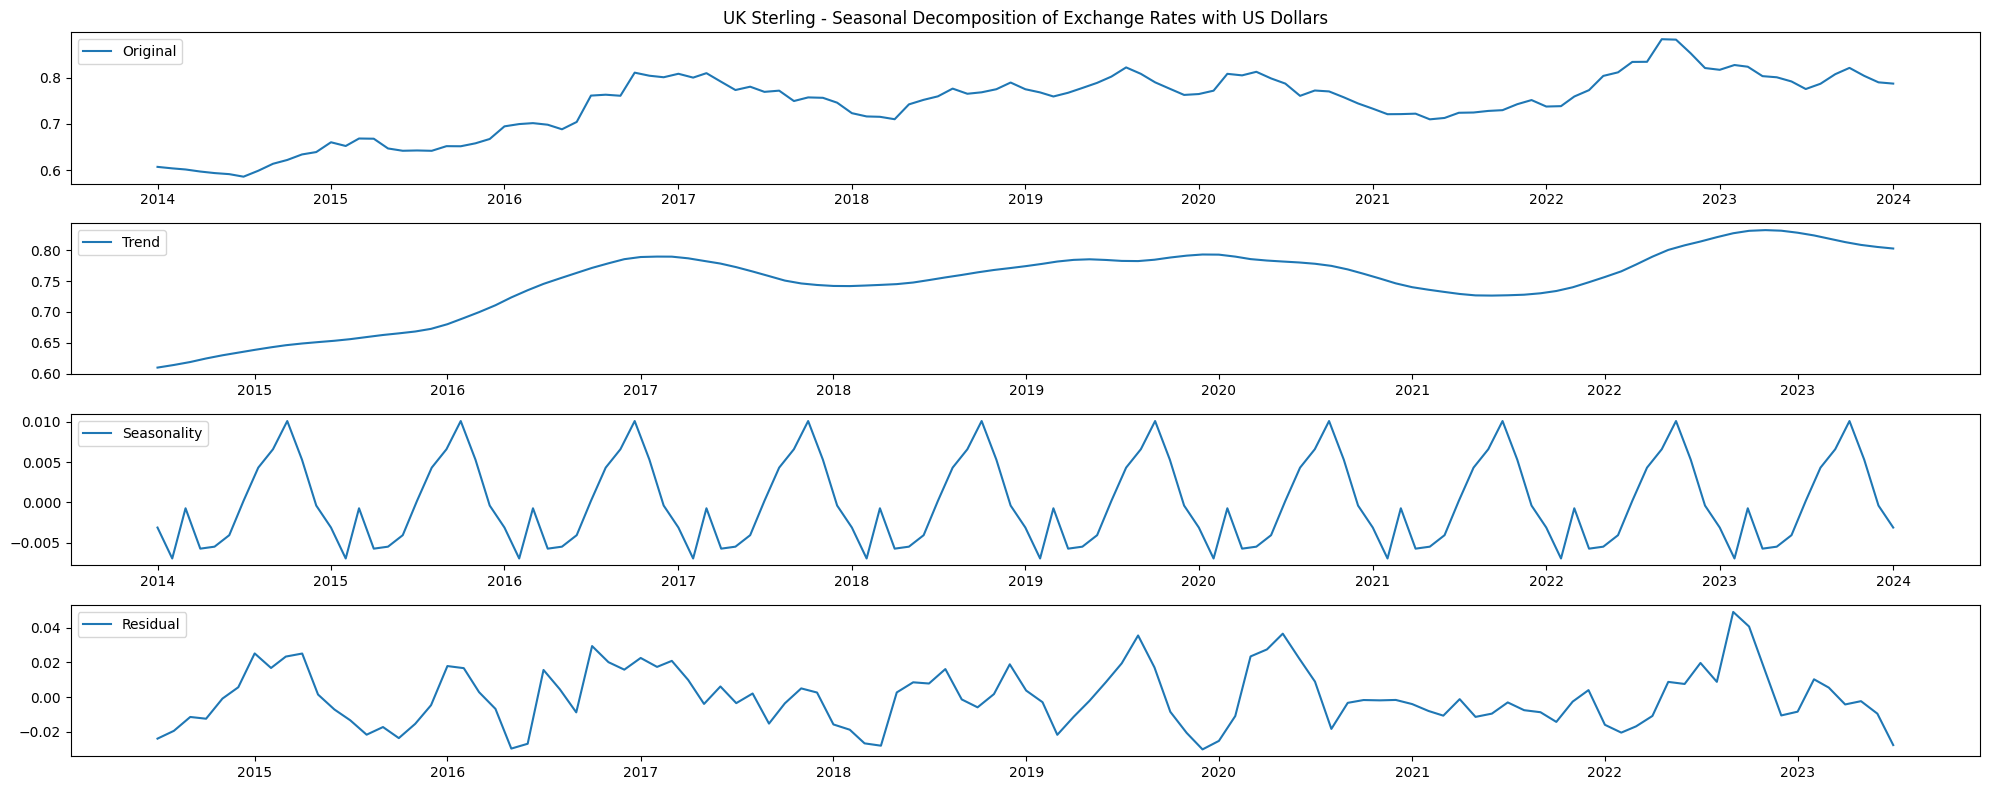

In [33]:
uk_decomposition = seasonal_decompose(uk_df['Exchange_rate'], model='additive', period = 12)
uk_trend = uk_decomposition.trend
uk_seasonal = uk_decomposition.seasonal
uk_residual = uk_decomposition.resid
plt.figure(figsize = (20,8))
plt.subplot(411)
plt.title("UK Sterling - Seasonal Decomposition of Exchange Rates with US Dollars")
plt.plot(uk_df, label = "Original")
plt.legend(loc = "upper left")
plt.subplot(412)
plt.plot(uk_trend, label = "Trend")
plt.legend(loc = "upper left")
plt.subplot(413)
plt.plot(uk_seasonal, label = "Seasonality")
plt.legend(loc = "upper left")
plt.subplot(414)
plt.plot(uk_residual, label = "Residual")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

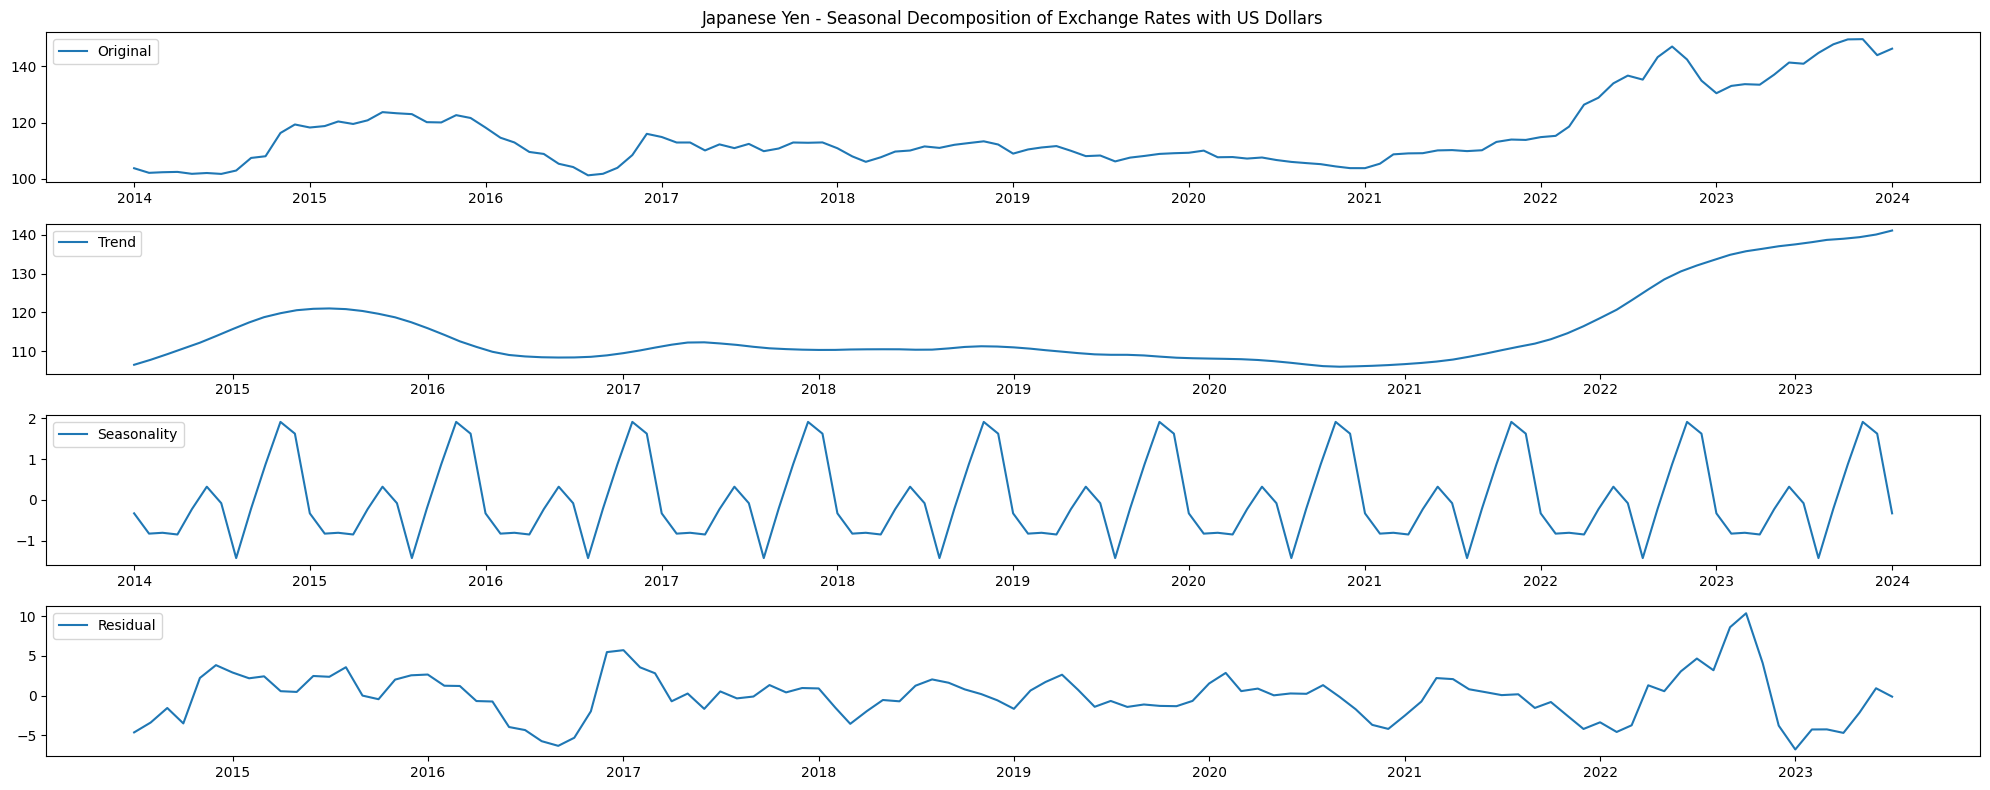

In [34]:
japan_decomposition = seasonal_decompose(japan_df['Exchange_rate'], model='additive', period = 12)
japan_trend = japan_decomposition.trend
japan_seasonal = japan_decomposition.seasonal
japan_residual = japan_decomposition.resid
plt.figure(figsize = (20,8))
plt.subplot(411)
plt.title("Japanese Yen - Seasonal Decomposition of Exchange Rates with US Dollars")
plt.plot(japan_df, label = "Original")
plt.legend(loc = "upper left")
plt.subplot(412)
plt.plot(japan_trend, label = "Trend")
plt.legend(loc = "upper left")
plt.subplot(413)
plt.plot(japan_seasonal, label = "Seasonality")
plt.legend(loc = "upper left")
plt.subplot(414)
plt.plot(japan_residual, label = "Residual")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

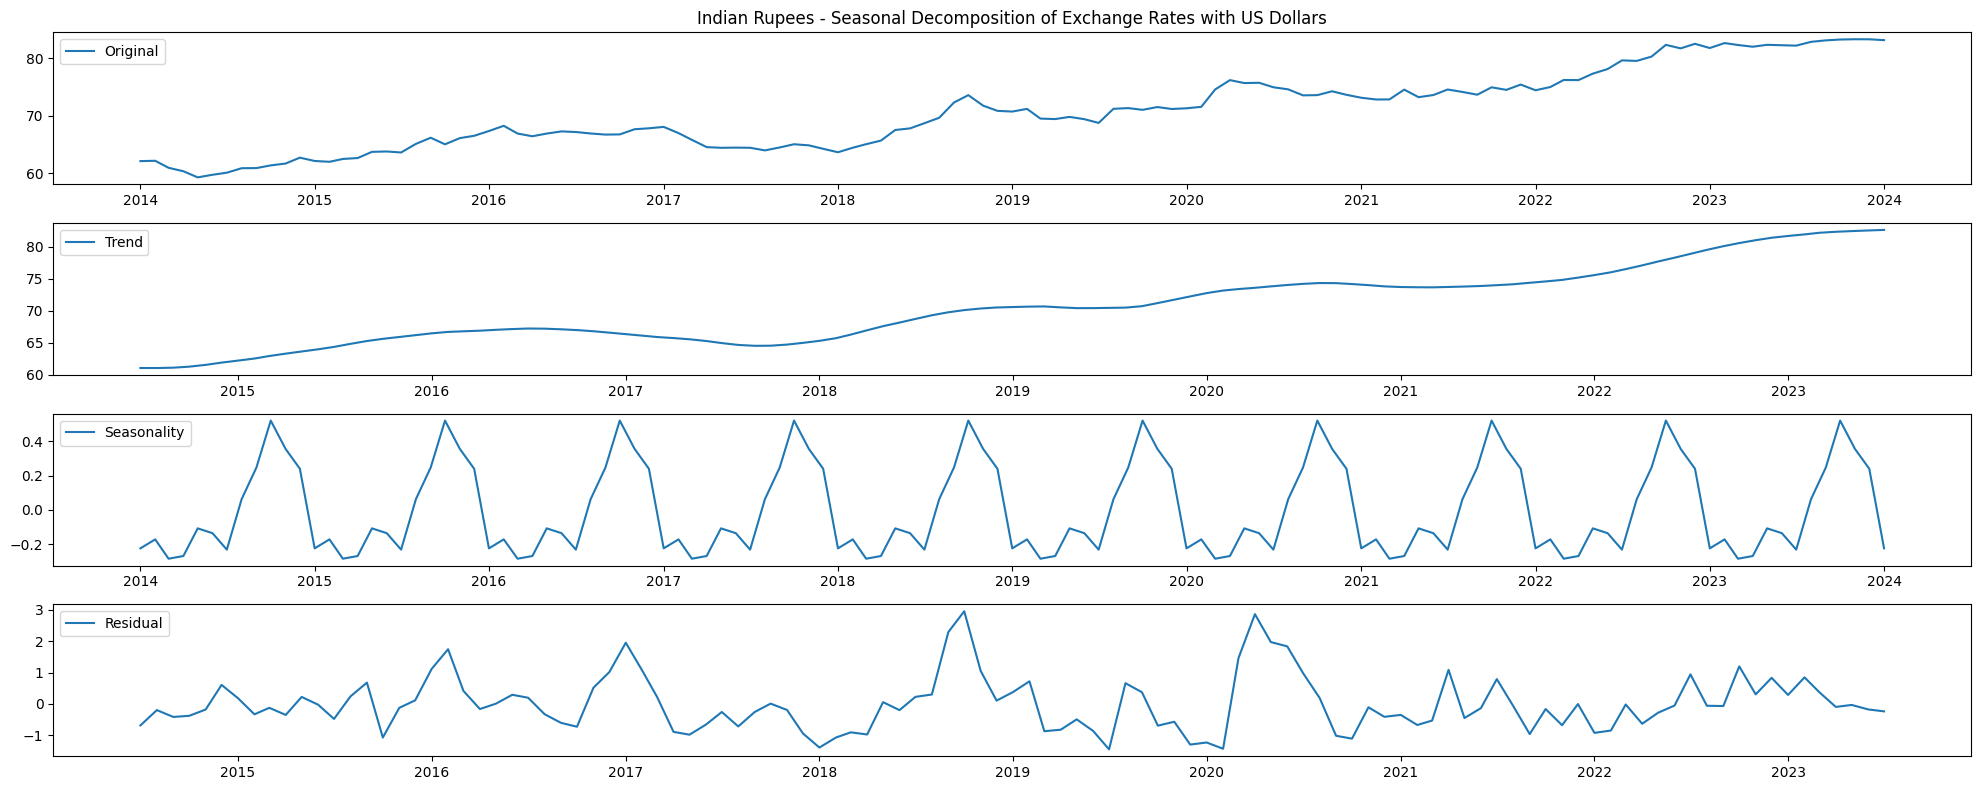

In [35]:
ind_decomposition = seasonal_decompose(ind_df['Exchange_rate'], model='additive', period = 12)
ind_trend =ind_decomposition.trend
ind_seasonal = ind_decomposition.seasonal
ind_residual = ind_decomposition.resid
plt.figure(figsize = (20,8))
plt.subplot(411)
plt.title("Indian Rupees - Seasonal Decomposition of Exchange Rates with US Dollars")
plt.plot(ind_df, label = "Original")
plt.legend(loc = "upper left")
plt.subplot(412)
plt.plot(ind_trend, label = "Trend")
plt.legend(loc = "upper left")
plt.subplot(413)
plt.plot(ind_seasonal, label = "Seasonality")
plt.legend(loc = "upper left")
plt.subplot(414)
plt.plot(ind_residual, label = "Residual")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

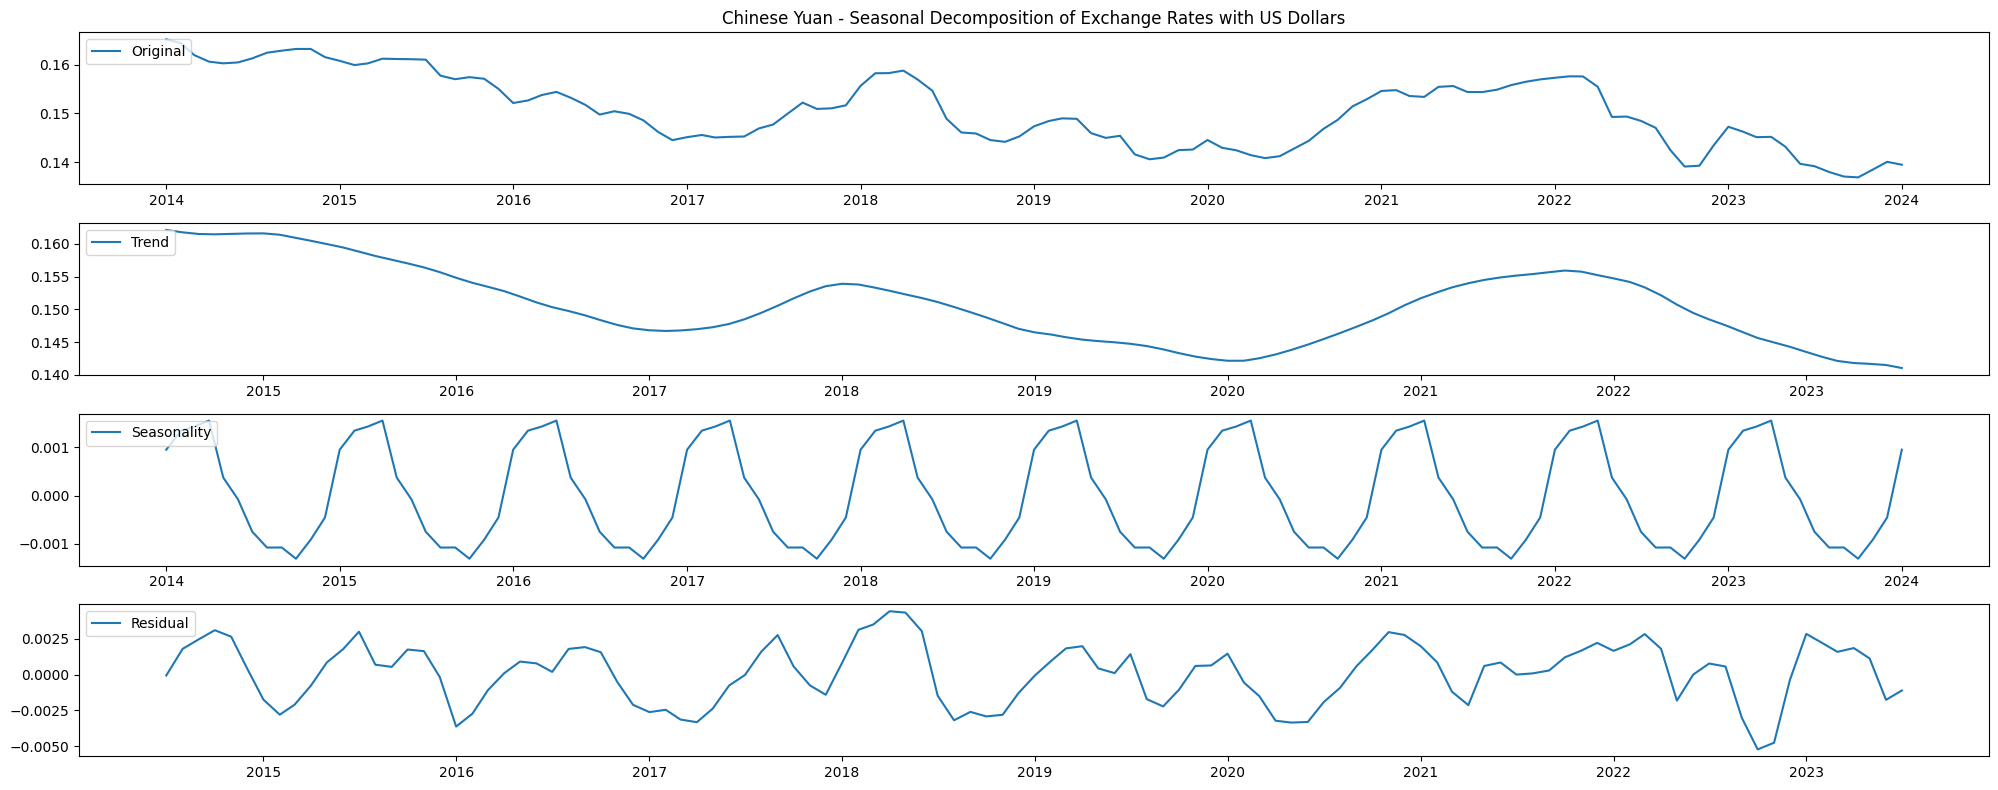

In [36]:
chn_decomposition = seasonal_decompose(chn_df['Exchange_rate'], model='additive', period = 12)
chn_trend = chn_decomposition.trend
chn_seasonal = chn_decomposition.seasonal
chn_residual = chn_decomposition.resid
plt.figure(figsize = (20,8))
plt.subplot(411)
plt.title("Chinese Yuan - Seasonal Decomposition of Exchange Rates with US Dollars")
plt.plot(chn_df, label = "Original")
plt.legend(loc = "upper left")
plt.subplot(412)
plt.plot(chn_trend, label = "Trend")
plt.legend(loc = "upper left")
plt.subplot(413)
plt.plot(chn_seasonal, label = "Seasonality")
plt.legend(loc = "upper left")
plt.subplot(414)
plt.plot(chn_residual, label = "Residual")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

#### Notes

- We implemented an annual seasonality (period = 12) for the decomposition as the exchange rates tend to be follow a pattern on a monthly basis forming a cyclic pattern annually.

#### b) Differencing the exchange rates

We considered differencing for converting the datasets into stationary because the residuals obtained from the seasonal decomposition is not purely white noise and seems to have trend which might affect the ARIMA model.

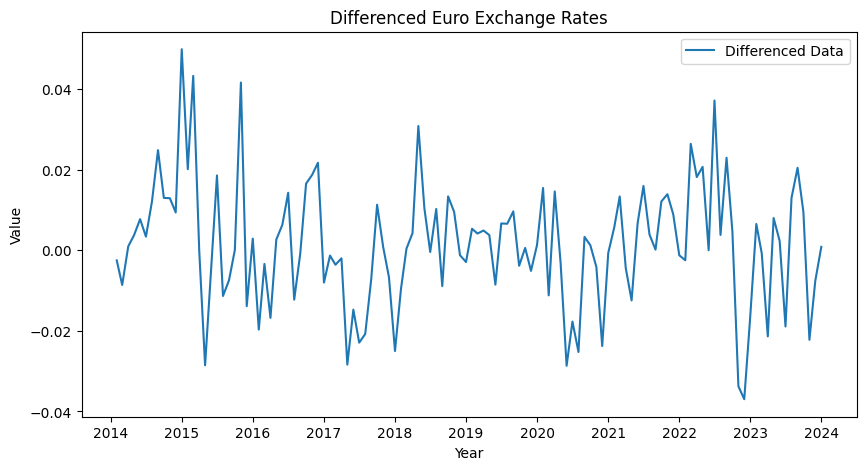

In [37]:
euro_df['Differenced_Data'] = euro_df['Exchange_rate'].diff()
euro_df = euro_df.dropna()
# Plot the differenced time series data
plt.figure(figsize=(10, 5))
plt.title("Differenced Euro Exchange Rates")
plt.plot(euro_df.index, euro_df['Differenced_Data'], label='Differenced Data')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

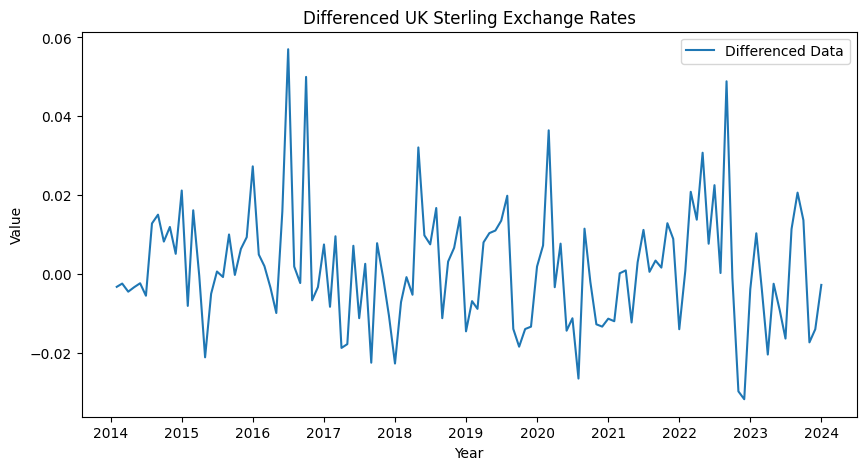

In [38]:
uk_df['Differenced_Data'] = uk_df['Exchange_rate'].diff()
uk_df = uk_df.dropna()
# Plot the differenced time series data
plt.figure(figsize=(10, 5))
plt.title("Differenced UK Sterling Exchange Rates")
plt.plot(uk_df.index, uk_df['Differenced_Data'], label='Differenced Data')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

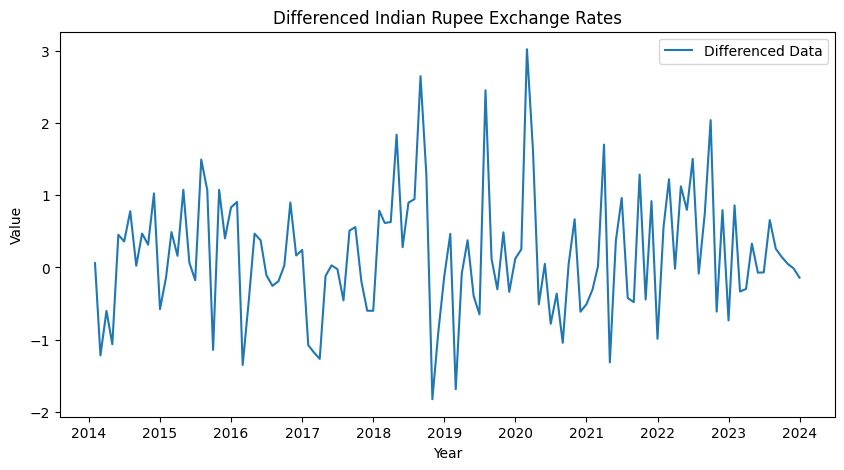

In [39]:
ind_df['Differenced_Data'] = ind_df['Exchange_rate'].diff()
ind_df = ind_df.dropna()
# Plot the differenced time series data
plt.figure(figsize=(10, 5))
plt.title("Differenced Indian Rupee Exchange Rates")
plt.plot(ind_df.index, ind_df['Differenced_Data'], label='Differenced Data')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

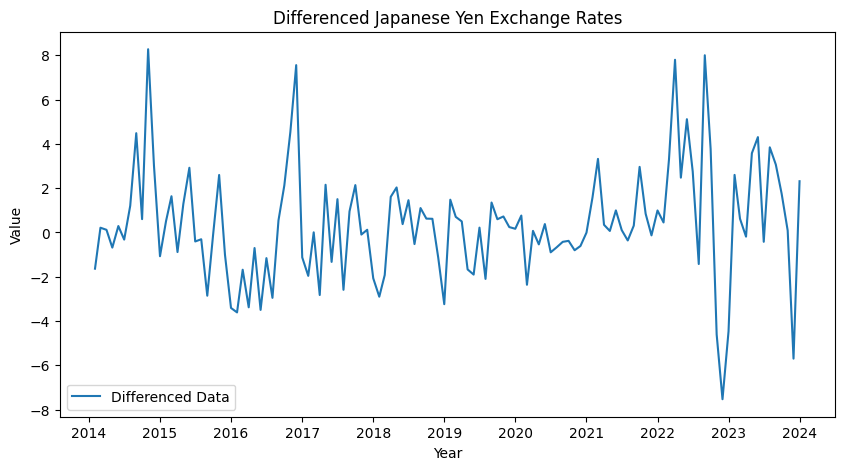

In [40]:
japan_df['Differenced_Data'] = japan_df['Exchange_rate'].diff()
japan_df = japan_df.dropna()
# Plot the differenced time series data
plt.figure(figsize=(10, 5))
plt.title("Differenced Japanese Yen Exchange Rates")
plt.plot(japan_df.index, japan_df['Differenced_Data'], label='Differenced Data')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

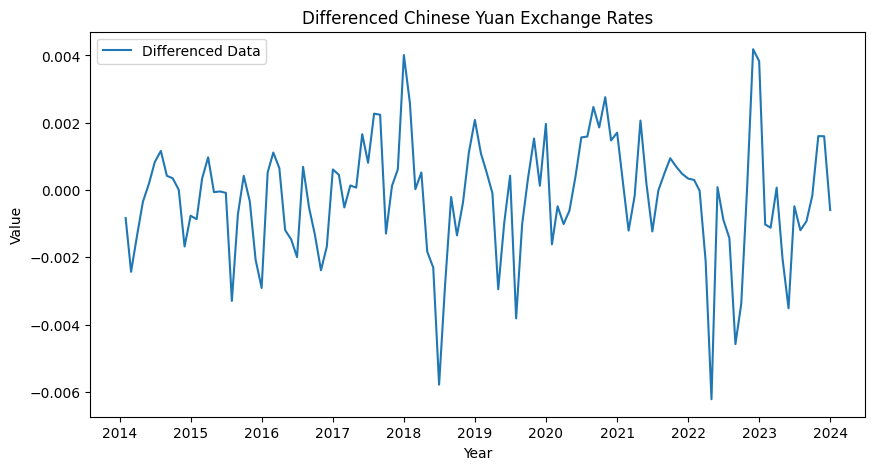

In [41]:
chn_df['Differenced_Data'] = chn_df['Exchange_rate'].diff()
chn_df = chn_df.dropna()
# Plot the differenced time series data
plt.figure(figsize=(10, 5))
plt.title("Differenced Chinese Yuan Exchange Rates")
plt.plot(chn_df.index, chn_df['Differenced_Data'], label='Differenced Data')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

The differenced data exhibits less traces of trends and is considered for the forecasting

#### Storing the final data sets on the local

In [42]:
chn_df.to_csv('data/china_finalm.csv')
ind_df.to_csv('data/ind_finalm.csv')
japan_df.to_csv('data/japan_finalm.csv')
euro_df.to_csv('data/euro_finalm.csv')
uk_df.to_csv('data/uk_finalm.csv')

### 7) Auto-Correlation and Partial Auto-Correlation Function

We use ACF and PACF to determine the best lag parameters for the ARIMA model -

`Autoregressive` - AR `(q)`

`Integrated` - I `(d)`

`Moving Average` - MA `(p)` 

We obtain the first insignificant lag from ACF and PACF plots to apply for `q` and `p` parameters respectively.

Since, we use the differenced dataset for the modeling and prediction, we will set <code>d = 0</code>

In [43]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

#### Euro Data

<Figure size 1000x600 with 0 Axes>

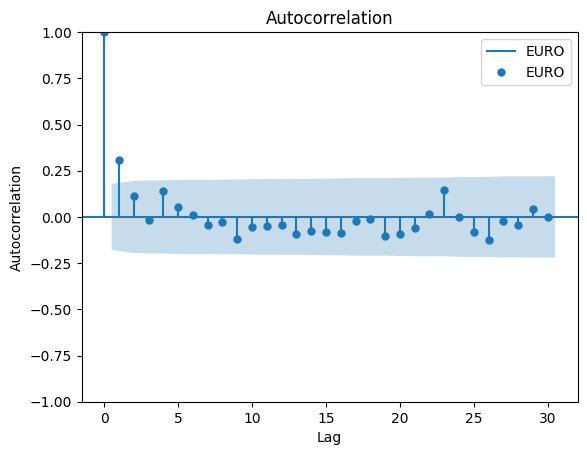

In [44]:
plt.figure(figsize=(10, 6))
plot_acf(euro_df['Differenced_Data'], lags=30, label = "EURO")
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

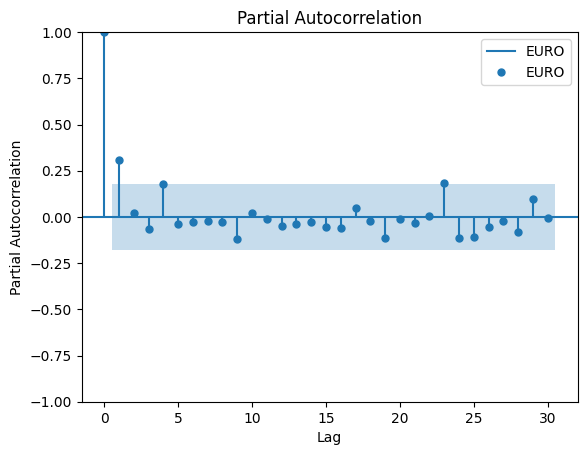

In [45]:
plt.figure(figsize=(10, 6))
plot_pacf(euro_df['Differenced_Data'], label = "EURO",lags=30)
#plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.legend()
plt.show()

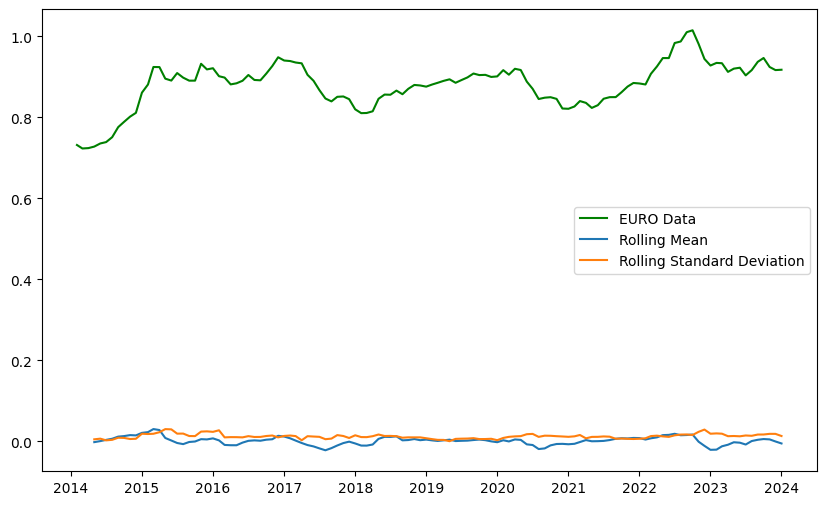

In [46]:
plt.figure(figsize=(10, 6))
window_size = 4 # Quarterly window
rolling_mean = euro_df['Differenced_Data'].rolling(window=window_size).mean()
rolling_std = euro_df['Differenced_Data'].rolling(window=window_size).std()
plt.plot(euro_df['Exchange_rate'], color = 'g', label = 'EURO Data')
plt.plot(rolling_mean, label = "Rolling Mean")
plt.plot(rolling_std, label = "Rolling Standard Deviation")
plt.legend();

In [47]:
# Perform the Augmented Dickey-Fuller (ADF) test
result = adfuller(euro_df['Differenced_Data'])
adf_statistic = result[0]
p_value = result[1]
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)
print('Critical Values',result[4])

ADF Statistic: -7.855208493755583
p-value: 5.466018643494887e-12
Critical Values {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}


#### Interpretation
- The differenced dataset has a constant mean and standard deviation over time, thus, it is a `weakily stationary` dataset.
- The p-value for the ADF test is almost 0, therefore, the Null Hypothesis is rejected and the dataset is considered to be `Stationary`.

Both tests prove that the data has been converted to `stationary`.

#### UK Pound Data

<Figure size 1000x600 with 0 Axes>

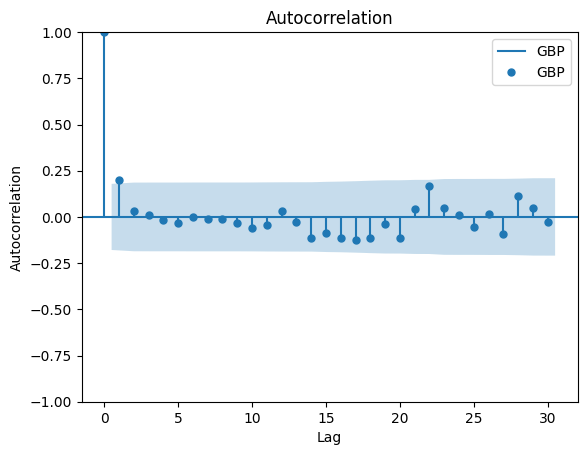

In [48]:
plt.figure(figsize=(10, 6))
plot_acf(uk_df['Differenced_Data'], label = "GBP", lags=30)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

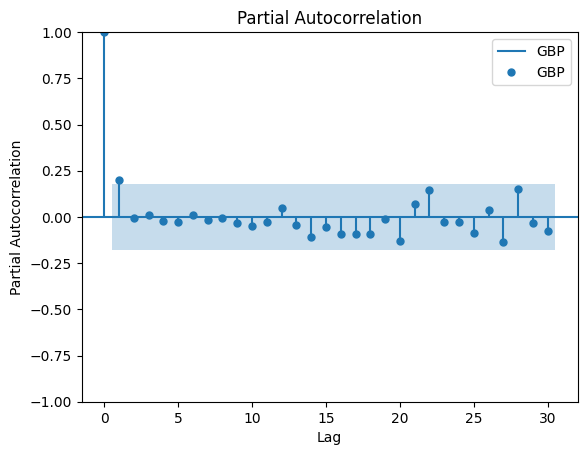

In [49]:
plt.figure(figsize=(10, 6))
plot_pacf(uk_df['Differenced_Data'], label = "GBP", lags=30)
#plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.legend()
plt.show()

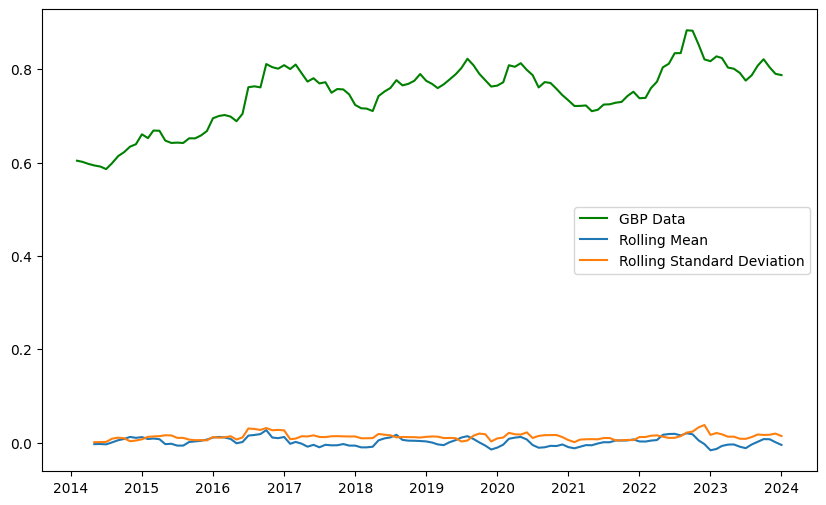

In [50]:
plt.figure(figsize=(10, 6))
window_size = 4 #Quarterly window
rolling_mean = uk_df['Differenced_Data'].rolling(window=window_size).mean()
rolling_std = uk_df['Differenced_Data'].rolling(window=window_size).std()
plt.plot(uk_df['Exchange_rate'], color = 'g', label = 'GBP Data')
plt.plot(rolling_mean, label = "Rolling Mean")
plt.plot(rolling_std, label = "Rolling Standard Deviation")
plt.legend();

In [51]:
# Perform the Augmented Dickey-Fuller (ADF) test
result = adfuller(uk_df['Differenced_Data'])
adf_statistic = result[0]
p_value = result[1]
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)
print('Critical Values',result[4])

ADF Statistic: -8.850673185063101
p-value: 1.5761144347693312e-14
Critical Values {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}


#### Interpretation
- The differenced dataset has a constant mean and standard deviation over time, thus, it is a `weakily stationary` dataset.
- The p-value for the ADF test is almost 0, therefore, the Null Hypothesis is rejected and the dataset is considered to be `Stationary`.

Both tests prove that the data has been converted to `stationary`.

#### Indian Rupees Data

<Figure size 1000x600 with 0 Axes>

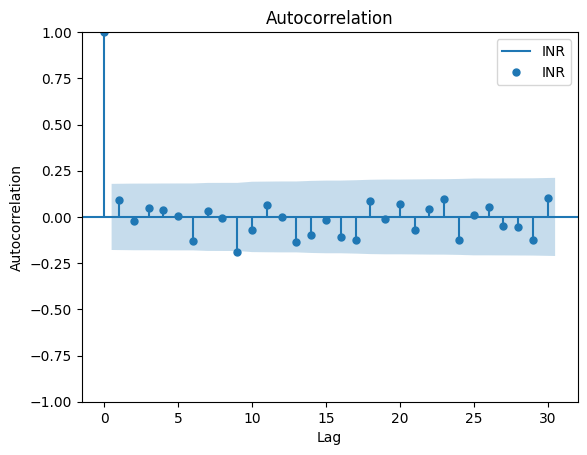

In [52]:
plt.figure(figsize=(10, 6))
plot_acf(ind_df['Differenced_Data'], label = "INR", lags=30)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

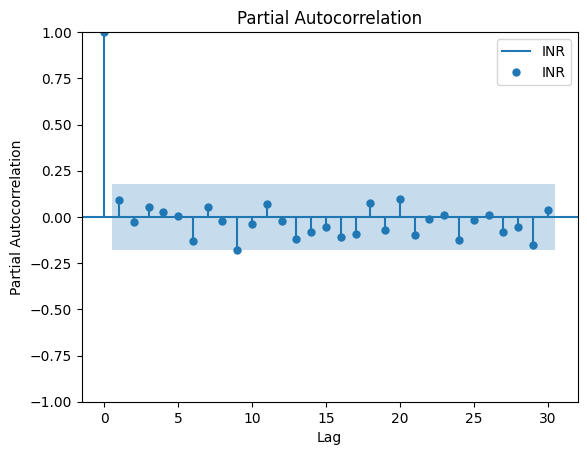

In [53]:
plt.figure(figsize=(10, 6))
plot_pacf(ind_df['Differenced_Data'], label = "INR", lags=30)
#plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.legend()
plt.show()

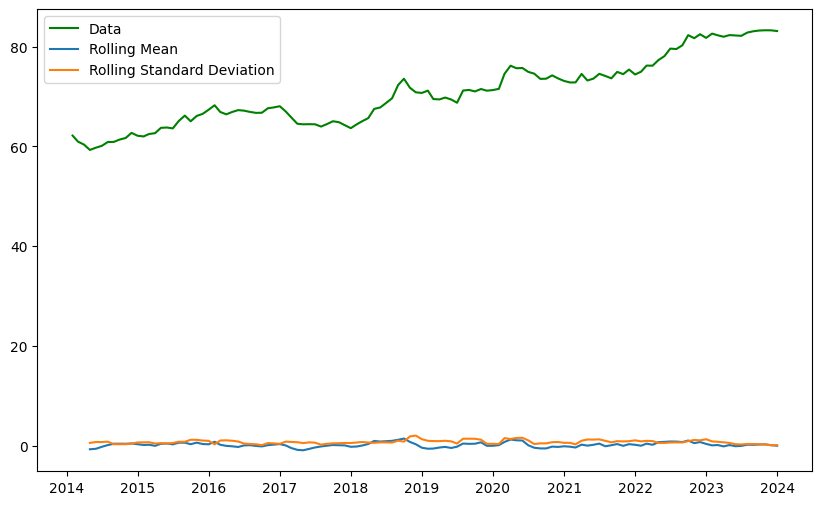

In [54]:
plt.figure(figsize=(10, 6))
window_size = 4 # Quarterly window
rolling_mean = ind_df['Differenced_Data'].rolling(window=window_size).mean()
rolling_std = ind_df['Differenced_Data'].rolling(window=window_size).std()
plt.plot(ind_df['Exchange_rate'], color = 'g', label = 'Data')
plt.plot(rolling_mean, label = "Rolling Mean")
plt.plot(rolling_std, label = "Rolling Standard Deviation")
plt.legend();

In [55]:
# Perform the Augmented Dickey-Fuller (ADF) test
result = adfuller(ind_df['Differenced_Data'])
adf_statistic = result[0]
p_value = result[1]
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)
print('Critical Values',result[4])

ADF Statistic: -9.880580822835732
p-value: 3.779527855106015e-17
Critical Values {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}


#### Interpretation
- The differenced dataset has a constant mean and standard deviation over time, thus, it is a `weakily stationary` dataset.
- The p-value for the ADF test is almost 0, therefore, the Null Hypothesis is rejected and the dataset is considered to be `Stationary`.

Both tests prove that the data has been converted to `stationary`.

#### Japanese Yen Data

<Figure size 1000x600 with 0 Axes>

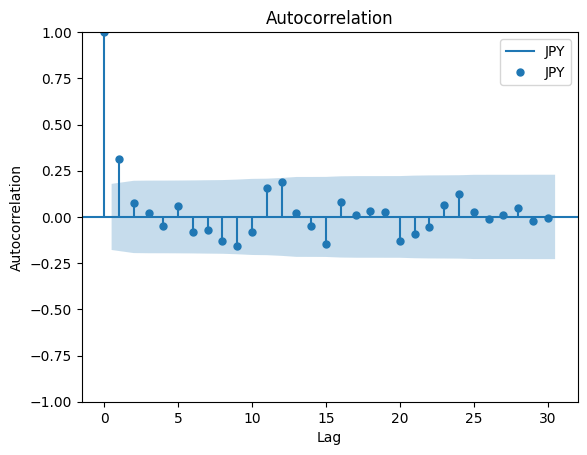

In [56]:
plt.figure(figsize=(10, 6))
plot_acf(japan_df['Differenced_Data'], label = "JPY", lags=30)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

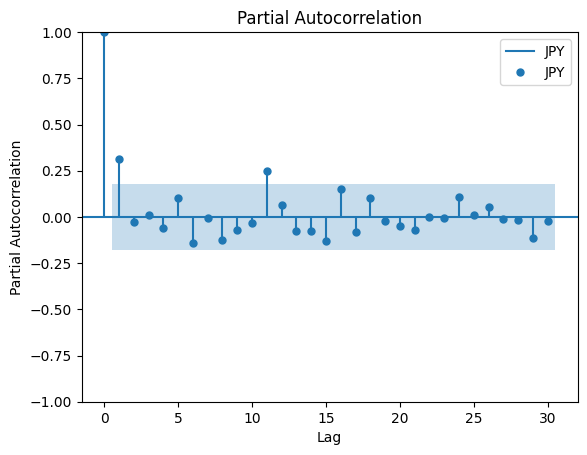

In [57]:
plt.figure(figsize=(10, 6))
plot_pacf(japan_df['Differenced_Data'], label = "JPY", lags=30)
#plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.legend()
plt.show()

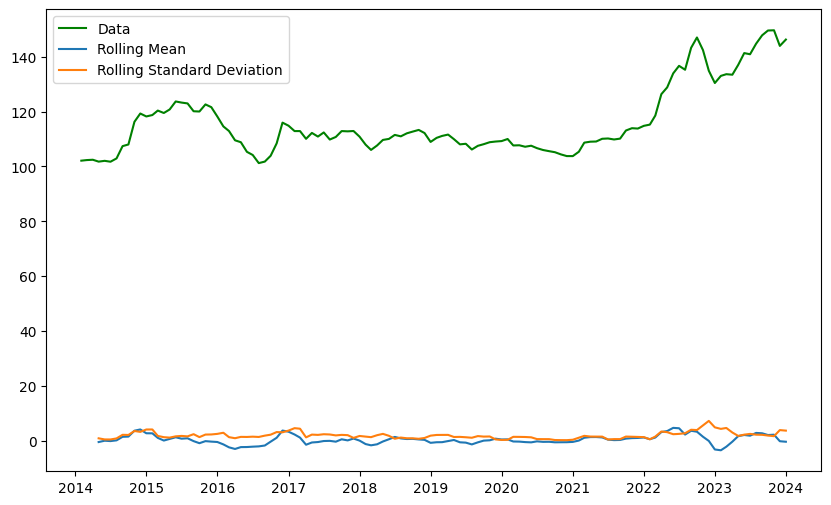

In [58]:
plt.figure(figsize=(10, 6))
window_size = 4 # Quarterly window
rolling_mean = japan_df['Differenced_Data'].rolling(window=window_size).mean()
rolling_std = japan_df['Differenced_Data'].rolling(window=window_size).std()
plt.plot(japan_df['Exchange_rate'], color = 'g', label = 'Data')
plt.plot(rolling_mean, label = "Rolling Mean")
plt.plot(rolling_std, label = "Rolling Standard Deviation")
plt.legend();

In [59]:
# Perform the Augmented Dickey-Fuller (ADF) test
result = adfuller(japan_df['Differenced_Data'])
adf_statistic = result[0]
p_value = result[1]
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)
print('Critical Values',result[4])

ADF Statistic: -7.811967230958364
p-value: 7.030735412400809e-12
Critical Values {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}


#### Interpretation
- The differenced dataset has a constant mean and standard deviation over time, thus, it is a `weakily stationary` dataset.
- The p-value for the ADF test is almost 0, therefore, the Null Hypothesis is rejected and the dataset is considered to be `Stationary`.

Both tests prove that the data has been converted to `stationary`.

#### Chinese Yuan Data

<Figure size 1000x600 with 0 Axes>

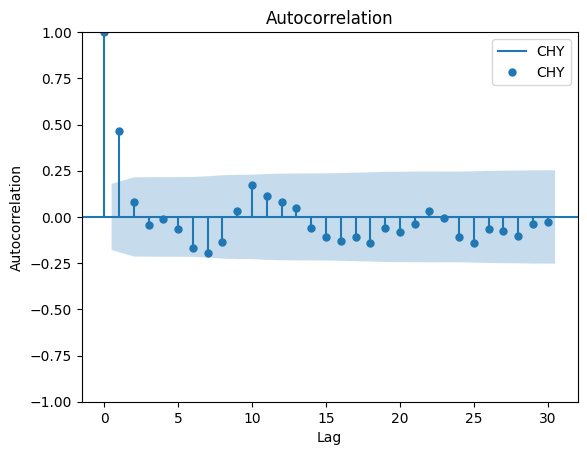

In [60]:
plt.figure(figsize=(10, 6))
plot_acf(chn_df['Differenced_Data'], label = "CHY",lags=30)
#plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

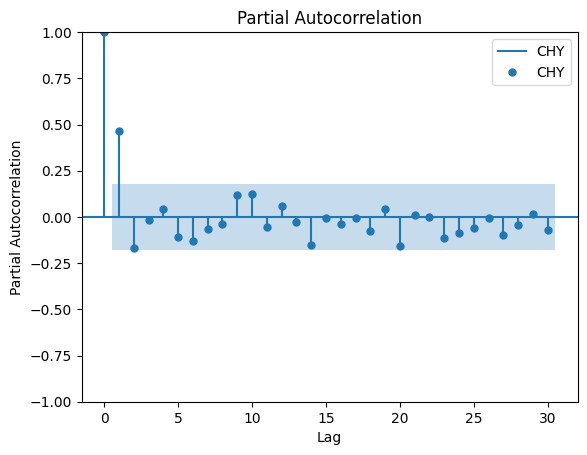

In [61]:
plt.figure(figsize=(10, 6))
plot_pacf(chn_df['Differenced_Data'], label = "CHY", lags=30)
#plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.legend()
plt.show()

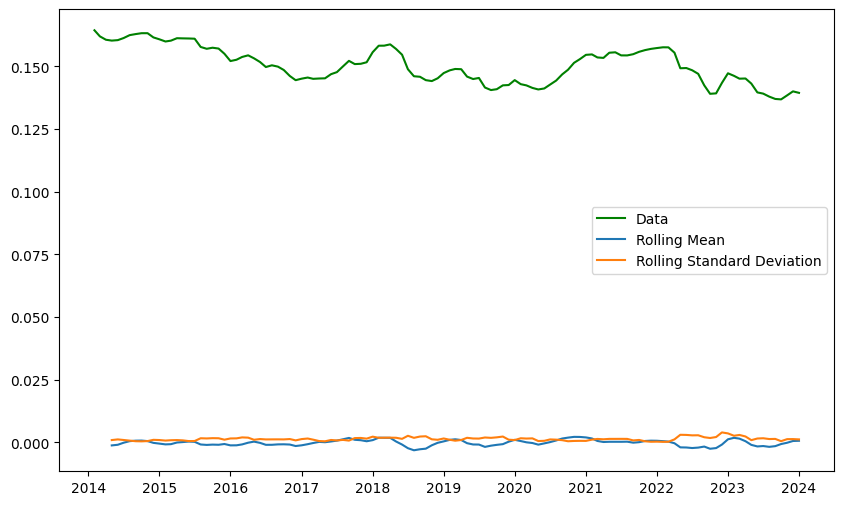

In [62]:
plt.figure(figsize=(10, 6))
window_size = 4 # Quarterly window
rolling_mean = chn_df['Differenced_Data'].rolling(window=window_size).mean()
rolling_std = chn_df['Differenced_Data'].rolling(window=window_size).std()
plt.plot(chn_df['Exchange_rate'], color = 'g', label = 'Data')
plt.plot(rolling_mean, label = "Rolling Mean")
plt.plot(rolling_std, label = "Rolling Standard Deviation")
plt.legend();

In [63]:
# Perform the Augmented Dickey-Fuller (ADF) test
result = adfuller(chn_df['Differenced_Data'])
adf_statistic = result[0]
p_value = result[1]
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)
print('Critical Values',result[4])

ADF Statistic: -6.6612307635578185
p-value: 4.8413905052921755e-09
Critical Values {'1%': -3.4870216863700767, '5%': -2.8863625166643136, '10%': -2.580009026141913}


#### Interpretation
- The differenced dataset has a constant mean and standard deviation over time, thus, it is a `weakily stationary` dataset.
- The p-value for the ADF test is almost 0, therefore, the Null Hypothesis is rejected and the dataset is considered to be `Stationary`.

Both tests prove that the data has been converted to `stationary`.

From the Auto-correlation and Partial Auto-correlation plots the parameters for Autoregressive `(p)` and Moving Average `(q)` models are determined as follows - 

**Euro**: `p = 4`, `q = 1`

**GBP**: `p = 1`, `q = 1`

**INR**: `p = 9`, `q = 9`

**JPY**: `p = 1`, `q = 1`

**CHY**: `p = 2`, `q = 1`

### Conclusion

The data is ready for Prediction and Forecasting.

We performed the following modeling

- ARIMA modeling on the differenced data
- SARIMA modeling on the differenced data with the seasonal orders
- SARIMAX modeling on the differenced data considering indicators of Inflation, Interest Rates, and Current Account Deficits as exogenous variables. We consider the USD/INR exchange rate only for SARIMAX forecasting.
